<a href="https://colab.research.google.com/github/Hj-lh/AI-Powered-Arabic-Chatbot-with-NLP/blob/main/DeepLearning_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
2+2

4

In [ ]:
import torch
import numpy as np

In [ ]:
n = np.random.randn(2,3)
print(n)

t = torch.randn(2,3)

print(t)

[[ 1.43393411 -0.95832165  0.04156187]
 [ 0.87490143  1.09275681  0.07244518]]
tensor([[-0.3025, -0.1196, -0.2670],
        [ 0.9322, -0.8495, -1.0356]])


In [ ]:
t3 = torch.zeros(2,3,4)
print(t3)
torch.arange(10)

tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
resh=t.reshape(3,-1)#-1 if we don't know the number of item
print(resh)

tensor([[-0.3025, -0.1196],
        [-0.2670,  0.9322],
        [-0.8495, -1.0356]])


##How it Works


On a lower level neural networks are simply a combination of elementry math operations and some more advanced linear algebra. Each neural network consists of a sequence of layers in which data passes through. These layers are made up on neurons and the neurons of one layer are connected to the next  These connections are defined by what we call a weight  Each layer also has something called a bias, this is simply an extra neuron that has no connections and holds a single numeric value. Data starts at the input layer and is trasnformed as it passes through subsequent layers. The data at each subsequent neuron is defined as the following.

> $Y =(\sum_{i=0}^n w_i x_i) + b$

> $w$ stands for the weight of each connection to the neuron

> $x$ stands for the value of the connected neuron from the previous value

> $b$ stands for the bias at each layer, this is a constant

> $n$ is the number of connections

> $Y$ is the output of the current neuron

> $\sum$ stands for sum

The equation you just read is called a weighed sum. We will take this weighted sum at each and every neuron as we pass information through the network. Then we will add what's called a bias to this sum. The bias allows us to shift the network up or down by a constant value. It is like the y-intercept of a line.

But that equation is the not complete one! We forgot a crucial part, **the activation function**. This is a function that we apply to the equation seen above to add complexity and dimensionality to our network. Our new equation with the addition of an activation function $F(x)$ is seen below.

> $Y =F((\sum_{i=0}^n w_i x_i) + b)$

Our network will start with predefined activation functions (they may be different at each layer) but random weights and biases. As we train the network by feeding it data it will learn the correct weights and biases and adjust the network accordingly using a technqiue called **backpropagation** (explained below). Once the correct weights and biases have been learned our network will hopefully be able to give us meaningful predictions. We get these predictions by observing the values at our final layer, the output layer.




###Activation Function
Activation functions are simply a function that is applied to the weighed sum of a neuron. They can be anything we want but are typically higher order/degree functions that aim to add a higher dimension to our data. We would want to do this to introduce more comolexity to our model. By transforming our data to a higher dimension, we can typically make better, more complex predictions.

A list of some common activation functions and their graphs can be seen below.

- Relu (Rectified Linear Unit)

![alt text](https://yashuseth.files.wordpress.com/2018/02/relu-function.png?w=309&h=274)
- Tanh (Hyperbolic Tangent)

![alt text](http://mathworld.wolfram.com/images/interactive/TanhReal.gif)
- Sigmoid

![alt text](https://miro.medium.com/max/970/1*Xu7B5y9gp0iL5ooBj7LtWw.png)



###Backpropagation
Backpropagation is the fundemental algorithm behind training neural networks. It is what changes the weights and biases of our network. To fully explain this process, we need to start by discussing something called a cost/loss function.

####Loss/Cost Function
As we now know our neural network feeds information through the layers until it eventually reaches an output layer. This layer contains the results that we look at to determine the prediciton from our network. In the training phase it is likely that our network will make many mistakes and poor predicitions. In fact, at the start of training our network doesn't know anything (it has random weights and biases)!

We need some way of evaluating if the network is doing well and how well it is doing. For our training data we have the features (input) and the labels (expected output), because of this we can compare the output from our network to the expected output. Based on the difference between these values we can determine if our network has done a good job or poor job. If the network has done a good job, we'll make minor changes to the weights and biases. If it has done a poor job our changes may be more drastic.

So, this is where the cost/loss function comes in. This function is responsible for determining how well the network did. We pass it the output and the expected output, and it returns to us some value representing the cost/loss of the network. This effectively makes the networks job to optimize this cost function, trying to make it as low as possible.

Some common loss/cost functions include.
- Mean Squared Error
- Mean Absolute Error
- Hinge Loss

####Gradient Descent
Gradient descent and backpropagation are closely related. Gradient descent is the algorithm used to find the optimal paramaters (weights and biases) for our network, while backpropagation is the process of calculating the gradient that is used in the gradient descent step.

Gradient descent requires some pretty advanced calculus and linear algebra to understand so we'll stay away from that for now. Let's just read the formal definition for now.

"Gradient descent is an optimization algorithm used to minimize some function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. In machine learning, we use gradient descent to update the parameters of our model." (https://ml-cheatsheet.readthedocs.io/en/latest/gradient_descent.html)

And that's all we really need to know for now. I'll direct you to the video for a more in depth explination.

![alt text](https://cdn-images-1.medium.com/max/1000/1*iU1QCnSTKrDjIPjSAENLuQ.png)



###Optimizer
You may sometimes see the term optimizer or optimization function. This is simply the function that implements the backpropagation algorithm described above. Here's a list of a few common ones.
- Gradient Descent
- Stochastic Gradient Descent
- Mini-Batch Gradient Descent
- Momentum
- Nesterov Accelerated Gradient

*This article explains them quite well is where I've pulled this list from.*

(https://medium.com/@sdoshi579/optimizers-for-training-neural-network-59450d71caf6)

###Creating a Neural Network for iris dataset


In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch

In [ ]:
class Model(nn.Module):
    def __init__(self, in_features=4, h1=8,h2=10,out_feature=3):
        super().__init__()
        self.fc1 = nn.Linear(in_features,h1)
        self.fc2 = nn.Linear(h1,h2)
        self.out = nn.Linear(h2,out_feature)

    def forward(self,x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)
        return x


In [ ]:
torch.manual_seed(32)
model = Model()

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

In [ ]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
# prompt: Using dataframe df: any plot that fit a classification data

# Import necessary libraries
import altair as alt

# Create a scatter plot to visualize the data
chart = alt.Chart(df).mark_circle().encode(
    x='sepal_length',
    y='sepal_width',
    color='species'
).interactive()

chart


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

In [ ]:
# prompt: change last column to numbers

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# prompt: now what is the next step after preparing data

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X = df.drop('species', axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert the data to PyTorch tensors
X_train = torch.tensor(X_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.long)
X_test = torch.tensor(X_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.long)


In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)



In [ ]:
# prompt: seeing the parameter feature of the neoron of the model

for name, param in model.named_parameters():
  print(name, param.shape)


fc1.weight torch.Size([8, 4])
fc1.bias torch.Size([8])
fc2.weight torch.Size([10, 8])
fc2.bias torch.Size([10])
out.weight torch.Size([3, 10])
out.bias torch.Size([3])


In [ ]:
epochs = 200
losses = []

for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())
  print(f'epoch: {i} loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


epoch: 0 loss: 1.149993896484375
epoch: 1 loss: 1.1030672788619995
epoch: 2 loss: 1.0738177299499512
epoch: 3 loss: 1.0469074249267578
epoch: 4 loss: 1.0182758569717407
epoch: 5 loss: 0.9936543107032776
epoch: 6 loss: 0.9782741069793701
epoch: 7 loss: 0.9580065011978149
epoch: 8 loss: 0.9323127269744873
epoch: 9 loss: 0.9051439166069031
epoch: 10 loss: 0.8815345168113708
epoch: 11 loss: 0.8588753342628479
epoch: 12 loss: 0.833585798740387
epoch: 13 loss: 0.8063619136810303
epoch: 14 loss: 0.7782983779907227
epoch: 15 loss: 0.7508805990219116
epoch: 16 loss: 0.7240581512451172
epoch: 17 loss: 0.6975662708282471
epoch: 18 loss: 0.6712697744369507
epoch: 19 loss: 0.6453168392181396
epoch: 20 loss: 0.6199997067451477
epoch: 21 loss: 0.5956150889396667
epoch: 22 loss: 0.5724266767501831
epoch: 23 loss: 0.5507786273956299
epoch: 24 loss: 0.5306771993637085
epoch: 25 loss: 0.5120856165885925
epoch: 26 loss: 0.4949275553226471
epoch: 27 loss: 0.4790625274181366
epoch: 28 loss: 0.46436101198196

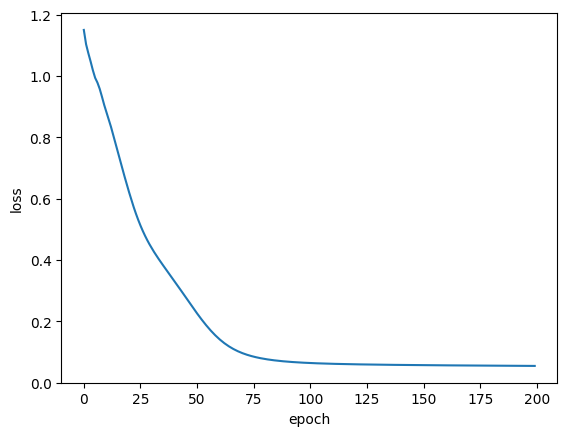

In [ ]:
plt.plot(range(epochs), losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# prompt: evaluate test data


with torch.no_grad():#trun off back propogation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)
loss

tensor(0.0525)

In [ ]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)
    print(f'{i+1:2}. {str(y_val):38} {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1
    else:
      print('Wrong')
print(f'\n{correct} out of {len(y_test)} = {100*correct/len(y_test):.2f}% correct')

 1. tensor([-2.8068,  7.2056,  1.1778])    1
 2. tensor([ 14.5165,   6.2757, -23.7825]) 0
 3. tensor([-15.6749,   4.8301,  22.1169]) 2
 4. tensor([-3.5206,  6.7673,  2.4853])    1
 5. tensor([-3.5389,  7.4559,  2.1947])    1
 6. tensor([ 13.3686,   5.9260, -21.9619]) 0
 7. tensor([ 0.5689,  7.0884, -3.8943])    1
 8. tensor([-8.4547,  5.9281, 10.4868])    2
 9. tensor([-5.6545,  6.0341,  6.1177])    1
Wrong
10. tensor([-0.6178,  7.3182, -2.2434])    1
11. tensor([-6.8809,  6.2562,  7.9036])    2
12. tensor([ 12.8960,   5.4549, -21.0395]) 0
13. tensor([ 14.5085,   5.9232, -23.5769]) 0
14. tensor([ 13.0558,   5.5880, -21.3390]) 0
15. tensor([ 14.1320,   5.7634, -22.9554]) 0
16. tensor([-3.1322,  7.2735,  1.6513])    1
17. tensor([-11.1313,   5.0936,  14.9919]) 2
18. tensor([-0.9425,  7.0450, -1.6175])    1
19. tensor([-3.0633,  6.7276,  1.7956])    1
20. tensor([-11.1952,   4.8607,  15.2000]) 2
21. tensor([ 12.4326,   5.5374, -20.4265]) 0
22. tensor([-6.1529,  6.1179,  6.8440])    2
23. 